In [368]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [369]:
ages = {}
grades = {}
boys = {}
girls = {}

with open('./sample_data/Maths.csv', 'r') as file:
  reader = csv.reader(file)
  for row in reader:
    age = row[2]
    if age != 'age':
      gradeMedia = (int(row[30]) + int(row[31]) + int(row[32]))/3
      
      #number of people by age
      try:
        ages[age] += 1
      except:
        ages[age] = 1
      
      #grades by age
      try:
          grades[age].append(gradeMedia)
      except:
        grades[age] = []
        grades[age].append(gradeMedia)
      
      #gender by age
      if row[1] == 'F':
        try:
          girls[age] += 1
        except:
          girls[age] = 1
      else:
        try:
          boys[age] += 1
        except:
          boys[age] = 1

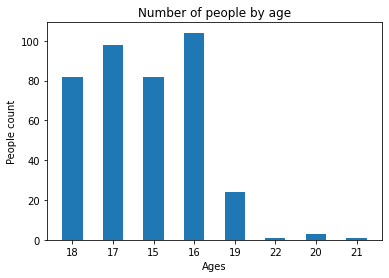

In [370]:
allKeys = []
allAges = []

for age in ages.keys():
  allKeys.append(age)
  allAges.append(ages[age])

plt.subplot()
plt.bar(allKeys, allAges, width=0.5)
plt.title("Number of people by age")
plt.xlabel("Ages")
plt.ylabel("People count")
plt.show()

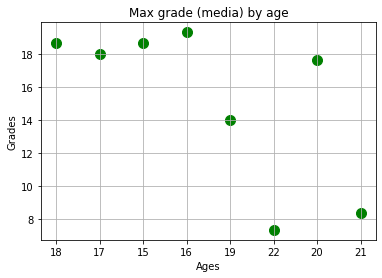

In [371]:
allGrades = []

for grade in grades:
  ageGradeList = grades[grade]
  ageGradeList.sort()
  allGrades.append(ageGradeList[-1])

plt.subplot()
plt.scatter(allKeys, allGrades, c="green", s=100)
plt.title("Max grade (media) by age")
plt.xlabel("Ages")
plt.ylabel("Grades")
plt.grid()
plt.show()

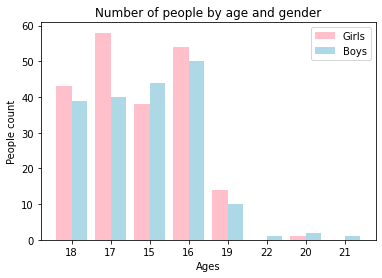

In [372]:
#equalize boys/girls key count
if len(boys) > len(girls):
  for ageKey in boys:
    try:
      newAge = girls[ageKey]
    except:
      girls[ageKey] = 0

if len(boys) < len(girls):
  for ageKey in girls:
    try:
      newAge = boys[ageKey]
    except:
      boys[ageKey] = 0

#generate new array with "ordered" ages
girlCount = []
boyCount = []
for key in allKeys:
  girlCount.append(girls[key])
  boyCount.append(boys[key])

#multiple bars config
x = np.arange(len(girls))
width = 0.4

plt.subplot()
bar1 = plt.bar(x, girlCount, width=width, label='Girls', color='pink')
bar2 = plt.bar(x + width, boyCount, width=width, label='Boys', color='lightblue')
plt.legend((bar1, bar2), ("Girls", "Boys"))
plt.xticks(x + width/2, allKeys)
plt.title("Number of people by age and gender")
plt.xlabel("Ages")
plt.ylabel("People count")
plt.show()
